# IF3170 Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 51

Group Members:
- Konstan Aftop Anewata Ndruru (12822058)
- Imam Hanif Mulyarahman (13522030)
- Bryan Cornelius Lauwrence (13522033)
- Amalia Putri (13522042)

## Import Libraries

In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as Imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

## Import Dataset

In [ ]:
# Example of reading a csv file from a gdrive link

# Take the file id from the gdrive file url
# https://drive.google.com/file/d/1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU/view?usp=sharing => The file id is 1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU
# and then put it in this format:
# https://drive.google.com/uc?id={file_id}
# Don't forget to change the access to public
flow_features = pd.read_csv('https://drive.google.com/uc?id=1WJPAohuba5Er-JpH075OFp7NoxdoNOgc')
basic_features = pd.read_csv('https://drive.google.com/uc?id=1tw6Icqirk3LCm9wibybBQU3znhVvs2WU')
content_features = pd.read_csv('https://drive.google.com/uc?id=1G4vyxXnOszbKIbAtwhBOyh4r9GxPwwQY')
time_features = pd.read_csv('https://drive.google.com/uc?id=1Zf7BjEHGaDO6mPFTcH3ExWr3IAgbYcVw')
add_features = pd.read_csv('https://drive.google.com/uc?id=197G_ECGO8jQUQiaHFyVmBayz31NRKppX')
label_features = pd.read_csv('https://drive.google.com/uc?id=1wQ6Q8zlxjH-eDfhnCR6I1o-bos07diJf')

In [ ]:
list_features=[add_features,basic_features,content_features,flow_features,time_features,label_features]
for features in list_features:
    features=pd.DataFrame(features)

df_train=add_features
list_features=[basic_features,content_features,flow_features,time_features,label_features]
for features in list_features:
    df_train=pd.merge(df_train,features,on='id')

df_train.drop(['label','id'],axis=1,inplace=True)
df_train.head(5)

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,...,response_body_len,proto,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,attack_cat
0,0.0,0.0,0.0,0.0,0.0,11.0,NaN,5.0,4.0,2.0,...,0.0,tcp,4449.110313,3234.831566,11.845558,6.261361,NaN,0.000444,0.000114,Normal
1,0.0,2.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,NaN,...,0.0,udp,0.000000,0.000000,0.009000,0.000000,0.000000,0.000000,NaN,Generic
2,0.0,NaN,0.0,0.0,0.0,4.0,4.0,2.0,2.0,1.0,...,0.0,tcp,8561.040438,249.950547,165.386453,172.345750,0.158826,0.057902,0.100924,Exploits
3,0.0,0.0,0.0,0.0,0.0,9.0,9.0,3.0,2.0,2.0,...,0.0,tcp,4053.086020,2918.730804,8.669644,4.496707,0.000558,0.000448,NaN,Normal
4,0.0,0.0,0.0,0.0,0.0,3.0,3.0,4.0,3.0,1.0,...,0.0,udp,0.000000,0.000000,0.008000,0.007000,0.000000,0.000000,0.000000,Normal


In [ ]:
df_train['is_sm_ips_ports']=df_train['is_sm_ips_ports'].astype('object')
df_train['is_ftp_login']=df_train['is_ftp_login'].astype('object')

# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

In [ ]:
# Size of the data
print("Numbers of instances :",df_train.shape[0],"and","Numbers of features : ",
df_train.shape[1])

Numbers of instances : 175341 and Numbers of features :  42


In [ ]:
# Show dtypes all features
categorical_features = df_train.select_dtypes(include='O').columns
numerical_features = df_train.select_dtypes(include=['int', 'float']).columns
print("Categorical Features:")
print(", ".join(categorical_features) if not categorical_features.empty else "None")

print("\nNumerical Features:")
print(", ".join(numerical_features) if not numerical_features.empty else "None")

Categorical Features:
is_sm_ips_ports, is_ftp_login, state, service, proto, attack_cat

Numerical Features:
ct_state_ttl, ct_flw_http_mthd, ct_ftp_cmd, ct_srv_src, ct_srv_dst, ct_dst_ltm, ct_src_ltm, ct_src_dport_ltm, ct_dst_sport_ltm, ct_dst_src_ltm, dur, sbytes, dbytes, sttl, dttl, sloss, dloss, sload, dload, spkts, dpkts, swin, dwin, stcpb, dtcpb, smean, dmean, trans_depth, response_body_len, sjit, djit, sinpkt, dinpkt, tcprtt, synack, ackdat


In [ ]:
df_train['is_ftp_login'].value_counts()

,count
is_ftp_login,
0.0,164251
1.0,2422
4.0,16
2.0,5


In [ ]:
df_train['is_sm_ips_ports'].value_counts()

,count
is_sm_ips_ports,
0.0,163963
1.0,2632


In [ ]:
df_train['state'].value_counts()

,count
state,
INT,78148
FIN,73925
CON,12481
REQ,1889
RST,78
ECO,12
URN,1
PAR,1
no,1


In [ ]:
df_train['proto'].value_counts()

,count
proto,
tcp,75902
udp,60105
unas,11480
arp,2726
ospf,2468
...,...
visa,89
leaf-2,89
igmp,18


In [ ]:
# Checking missing values
df_train.isnull().sum()

,0
is_sm_ips_ports,8746
ct_state_ttl,8635
ct_flw_http_mthd,8647
is_ftp_login,8647
ct_ftp_cmd,8842
ct_srv_src,8851
ct_srv_dst,8774
ct_dst_ltm,8738
ct_src_ltm,8823
ct_src_dport_ltm,8775


In [ ]:
# Checking number of outliers
train_numeric = df_train.select_dtypes(include=['int64', 'float64'])
Q1 = train_numeric.quantile(0.25)
Q3 = train_numeric.quantile(0.75)
IQR = Q3 - Q1
outliers = (train_numeric < (Q1 - 1.5 * IQR)) | (train_numeric > (Q3 + 1.5 * IQR))
outliers_count = outliers.sum()
print("Number of outliers in each feature:")
print(outliers_count)

Number of outliers in each feature:
ct_state_ttl          1838
ct_flw_http_mthd     16996
ct_ftp_cmd            2443
ct_srv_src           18379
ct_srv_dst           18380
ct_dst_ltm           21021
ct_src_ltm           12487
ct_src_dport_ltm     31801
ct_dst_sport_ltm     35385
ct_dst_src_ltm       16832
dur                  14968
sbytes               21760
dbytes               26698
sttl                     0
dttl                     0
sloss                10879
dloss                26996
sload                12843
dload                36132
spkts                23470
dpkts                19752
swin                     0
dwin                     0
stcpb                    0
dtcpb                    0
smean                19690
dmean                22185
trans_depth          16948
response_body_len    10723
sjit                 17146
djit                 19538
sinpkt               14034
dinpkt               13409
tcprtt               15228
synack               29934
ackdat             

In [ ]:
# Check duplicated
df_train.duplicated().sum()

5756

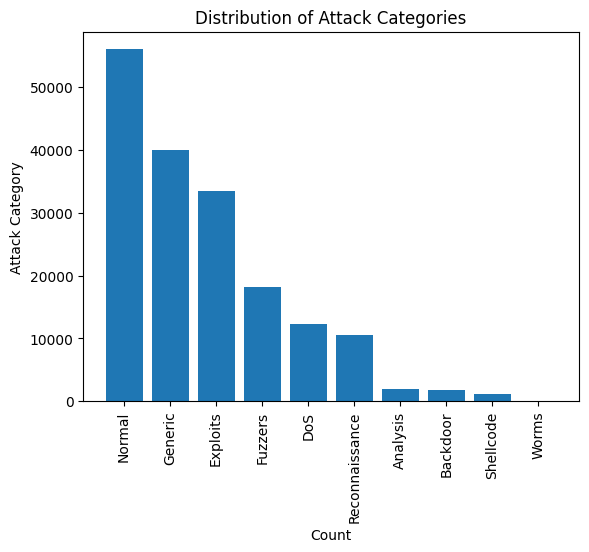

In [ ]:
plt.bar(df_train['attack_cat'].value_counts().index, height=df_train['attack_cat'].value_counts().values)
plt.xticks(rotation=90)
plt.xlabel('Count')
plt.ylabel('Attack Category')
plt.title('Distribution of Attack Categories')
plt.show()

# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [ ]:
df_tr,df_val=train_test_split(df_train, test_size=0.2, random_state=42)

In [ ]:
num_features=df_train.select_dtypes(include='number').columns
cat_features=df_train.drop('attack_cat',axis=1).select_dtypes(include='O').columns

# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [ ]:
# Handling Missing Data
class FeatureImputer(BaseEstimator, TransformerMixin):
    def __init__(self, num_features, cat_features):
        self.num_features = num_features
        self.cat_features = cat_features
        self.num_imputer = SimpleImputer(strategy='median')
        self.cat_imputer = SimpleImputer(strategy='most_frequent')

    def fit(self, df):
        self.num_imputer.fit(df[self.num_features])
        self.cat_imputer.fit(df[self.cat_features])
        return self

    def transform(self, df):
        df[self.num_features] = self.num_imputer.transform(df[self.num_features])
        df[self.cat_features] = self.cat_imputer.transform(df[self.cat_features])
        return df

### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [ ]:
# Capping Outliers
class CappingOutliers(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, df):
        self.lower_thresholds_ = {}
        self.upper_thresholds_ = {}
        self.iqr_ = {}
        for col in df.select_dtypes(include=["number"]).columns:
            lower_threshold = df[col].quantile(0.25)  # 25th percentile
            upper_threshold = df[col].quantile(0.75)  # 75th percentile
            iqr = upper_threshold - lower_threshold  # Interquartile range
            self.lower_thresholds_[col] = lower_threshold - 1.5 * iqr
            self.upper_thresholds_[col] = upper_threshold + 1.5 * iqr
            self.iqr_[col] = iqr
        return self

    def transform(self, df):
        df_copy = df.copy()
        for col in df.select_dtypes(include=["number"]).columns:
            df_copy[col] = df_copy[col].clip(
                lower=self.lower_thresholds_[col],
                upper=self.upper_thresholds_[col]
            )

        return df_copy

**"Lately, after modeling, we've decided to switch to using the RobustScaler, which is more resistant to outliers."**

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [ ]:
# Remove Duplicates
class RemoveDuplicates(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, df):
        return self

    def transform(self, df):
        df_copy = df.copy()
        df_copy = df_copy.drop_duplicates()
        return df_copy

### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

In [ ]:
# Feature Selection
correlation_matrix = df_train.corr(numeric_only=True)
threshold = 0.9
high_correlation = correlation_matrix[(correlation_matrix > threshold) | (correlation_matrix < -threshold)]
high_correlation = high_correlation.where(~np.eye(high_correlation.shape[0],dtype=bool)).stack()
print(high_correlation)

ct_srv_src        ct_srv_dst          0.980276
                  ct_dst_src_ltm      0.966881
ct_srv_dst        ct_srv_src          0.980276
                  ct_dst_src_ltm      0.972186
ct_dst_ltm        ct_src_dport_ltm    0.962079
ct_src_dport_ltm  ct_dst_ltm          0.962079
                  ct_dst_sport_ltm    0.906812
ct_dst_sport_ltm  ct_src_dport_ltm    0.906812
ct_dst_src_ltm    ct_srv_src          0.966881
                  ct_srv_dst          0.972186
sbytes            sloss               0.995869
                  spkts               0.962399
dbytes            dloss               0.996416
                  dpkts               0.971798
sloss             sbytes              0.995869
                  spkts               0.969613
dloss             dbytes              0.996416
                  dpkts               0.978632
spkts             sbytes              0.962399
                  sloss               0.969613
dpkts             dbytes              0.971798
             

In [ ]:
selected_features = [
    'ct_srv_src',
    'sbytes',
    'dbytes',
    'swin',
    'tcprtt','is_sm_ips_ports', 'is_ftp_login', 'state', 'service', 'proto', 'attack_cat'
]

In [ ]:
# Feature Selection
class SelectFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, selected_features):
        self.selected_features = selected_features

    def fit(self, df, y=None):
          return self

    def transform(self, df):
        df_copy = df.copy()
        df_copy = df_copy[self.selected_features]
        return df_copy

**"We selected certain features to prevent multicollinearity."**

## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [ ]:
# Example

# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEncoder(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):

#         # Fit the encoder here

#         return self

#     def transform(self, X):
#         X_encoded = X.copy()

#         # Encode the categorical variables here

#         return X_encoded

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [ ]:
# Feature Scaling
from sklearn.preprocessing import RobustScaler
class FeatureScaling(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = RobustScaler()

    def fit(self, X, y=None):
        num_features = X.select_dtypes(include=["number"]).columns
        self.scaler.fit(X[num_features])
        return self

    def transform(self, X):
        X_copy = X.copy()
        num_features = X_copy.select_dtypes(include=["number"]).columns
        X[num_features] = self.scaler.transform(X_copy[num_features])
        return X_copy

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [ ]:
# Feature Encoding
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')  # drop='first' for avoiding multicollinearity
        self.cat_features = None
    def fit(self, X, y=None):
        self.cat_features = X.select_dtypes(include=["object"]).columns
        self.encoder.fit(X[self.cat_features])
        return self

    def transform(self, X):
        X_copy = X.copy()
        cat_features = X_copy[self.cat_features]
        num_features = X_copy.drop(columns=self.cat_features)

        encoded_features = self.encoder.transform(cat_features)
        encoded_feature_names = self.encoder.get_feature_names_out(self.cat_features)

        encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=X_copy.index)

        transformed_df = pd.concat([num_features, encoded_df], axis=1)

        return transformed_df

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [ ]:
def handleimbalance(X,y):
    undersampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(X, y)
    return X_resampled, y_resampled

### IV. Data Normalization

Data normalization is used to achieve a standard distribution. Without normalization, models or processes that rely on the assumption of normality may not work correctly. Normalization helps reduce the magnitude effect and ensures numerical stability during optimization.

In [ ]:
# Write your code here

### V. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

In [ ]:
#

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [ ]:
# Cleaning pipeline
Cleaning = Pipeline([("imputer", FeatureImputer(num_features=num_features, cat_features=cat_features)),
                  #("capping", CappingOutliers()),
                     ("Duplicatesremover", RemoveDuplicates()),
                  ("selector", SelectFeatures(selected_features=selected_features)),
                 ])

In [ ]:
df_train_cleaned=Cleaning.fit_transform(df_tr)
df_val_cleaned=Cleaning.transform(df_val)

In [ ]:
X_train=df_train_cleaned.drop('attack_cat', axis=1)
X_val=df_val_cleaned.drop('attack_cat', axis=1)
y_train=df_train_cleaned['attack_cat']
y_val=df_val_cleaned['attack_cat']

In [ ]:
# Transformation
Preprocess = Imbpipeline([
    ("FeatureScaler", FeatureScaling()),
    ("FeatureEncoder",FeatureEncoder()),
    ])

In [ ]:
X_train_preprocessed=Preprocess.fit_transform(X_train)
X_val_preprocessed=Preprocess.transform(X_val)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
# Apply Resampler
X_resampled, y_resampled= handleimbalance(X_train_preprocessed,y_train)

In [ ]:
X_resampled.shape

(440170, 160)

In [ ]:
# Apply PCA
pca=PCA(n_components=5)
X_resampled=pca.fit_transform(X_resampled)
X_val_res=pca.transform(X_val_preprocessed)

In [ ]:
# Convert X_resampled and X_val_res to a dataframe
def toDF(X):
    df = pd.DataFrame(X, columns=[f'PC{i+1}' for i in range(X.shape[1])])
    return df

def toSeries(Y):
    series = pd.Series(Y)
    series.name = 'attack_cat'
    return series

or create your own here

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [ ]:
import pickle
from sklearn.preprocessing import LabelEncoder

class KNN:
    def __init__(self, k=3, distance_metric="1", p=3):
        self.k = k
        self.distance_metric = distance_metric
        self.p = p
        self.X_train = None
        self.y_train = None
        self.label_encoder = LabelEncoder()

    def fit(self, X, y):
        """Menyimpan data latih dan labelnya (DataFrame atau ndarray)."""
        if isinstance(X, pd.DataFrame):
            self.X_train = X.to_numpy()
        else:
            self.X_train = np.array(X)
       # print("X Train",self.X_train)

        if isinstance(y, pd.Series):
            self.y_train = y.to_numpy()
        self.y_train = self.label_encoder.fit_transform(y)
        self.y_train = self.y_train.astype(int)
       # print("Y Train",self.y_train)
        return self.X_train, self.y_train

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def _manhattan_distance(self, x1, x2):
        return np.sum(np.abs(x1 - x2))

    def _minkowski_distance(self, x1, x2):
        return np.sum(np.abs(x1 - x2) ** self.p) ** (1 / self.p)

    def distance_function(self, x1, x2):
        if self.distance_metric == "1":
            return self._euclidean_distance(x1, x2)
        elif self.distance_metric == "2":
            return self._manhattan_distance(x1, x2)
        elif self.distance_metric == "3":
            return self._minkowski_distance(x1, x2)
        else:
            raise ValueError(f"Unknown distance metric: {self.distance_metric}")

    def predictaa(self, X):
        """Mengembalikan prediksi untuk setiap data uji (DataFrame atau ndarray)."""
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        else:
            X = np.array(X)
        # print("PREDICT : ",X)

        predictions = []
        for x in X:
            distances = [self.distance_function(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_labels = self.y_train[k_indices]
            predictions.append(np.bincount(k_labels).argmax())
        return predictions

    def predict(self, X):
        """Mengembalikan prediksi untuk setiap data uji."""
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        else:
            X = np.array(X)

        predictions = []
        for x in X:
            distances = [self.distance_function(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_labels = self.y_train[k_indices]

            # Pastikan tipe k_labels adalah integer
            k_labels = np.array(k_labels, dtype=int)
            predictions.append(np.bincount(k_labels).argmax())

        # Decode hasil prediksi ke label kategorikal
        return self.label_encoder.inverse_transform(predictions)


    def save(self, filename):
        """Menyimpan model ke file."""
        with open(filename, "wb") as f:
            pickle.dump(self, f)
        print(f"Model saved to {filename}")

    @staticmethod
    def load(filename):
        """Memuat model dari file."""
        with open(filename, "rb") as f:
            model = pickle.load(f)
        print(f"Model loaded from {filename}")
        return model


In [ ]:
# Minkowski
knn=KNN(k=9, distance_metric="3", p=3)
knn.fit(X_resampled[:100], y_resampled[:100])
y_pred = knn.predict(X_val_res)
print("Classification Report:")
print(classification_report(y_val, y_pred))

Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       380
      Backdoor       0.00      0.00      0.00       365
           DoS       0.22      0.15      0.18      2233
      Exploits       0.29      0.41      0.34      6277
       Fuzzers       0.23      0.36      0.28      3618
       Generic       0.82      0.87      0.84      6636
        Normal       0.60      0.54      0.57     11164
Reconnaissance       0.00      0.00      0.00      1894
     Shellcode       0.00      0.00      0.00       259
         Worms       0.00      0.00      0.00        28

      accuracy                           0.49     32854
     macro avg       0.22      0.23      0.22     32854
  weighted avg       0.47      0.49      0.47     32854



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Manhattan
knn=KNN(k=9, distance_metric="2")
knn.fit(X_resampled[:100], y_resampled[:100])
y_pred = knn.predict(X_val_res)
print("Classification Report:")
print(classification_report(y_val, y_pred))

Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       380
      Backdoor       0.00      0.00      0.00       365
           DoS       0.21      0.15      0.17      2233
      Exploits       0.30      0.38      0.33      6277
       Fuzzers       0.21      0.35      0.26      3618
       Generic       0.82      0.87      0.85      6636
        Normal       0.65      0.59      0.62     11164
Reconnaissance       0.00      0.00      0.00      1894
     Shellcode       0.00      0.00      0.00       259
         Worms       0.00      0.00      0.00        28

      accuracy                           0.50     32854
     macro avg       0.22      0.23      0.22     32854
  weighted avg       0.48      0.50      0.49     32854



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Euclidean
knn=KNN(k=9, distance_metric="1")
knn.fit(X_resampled[:100], y_resampled[:100])
y_pred = knn.predict(X_val_res)
print("Classification Report:")
print(classification_report(y_val, y_pred))

Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       380
      Backdoor       0.00      0.00      0.00       365
           DoS       0.22      0.15      0.17      2233
      Exploits       0.33      0.39      0.36      6277
       Fuzzers       0.23      0.35      0.28      3618
       Generic       0.82      0.87      0.84      6636
        Normal       0.63      0.64      0.63     11164
Reconnaissance       0.00      0.00      0.00      1894
     Shellcode       0.00      0.00      0.00       259
         Worms       0.00      0.00      0.00        28

      accuracy                           0.52     32854
     macro avg       0.22      0.24      0.23     32854
  weighted avg       0.48      0.52      0.50     32854



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## B. Naive Bayes

In [ ]:
class NaiveBayes:
    def __init__(self):
        self.class_probs = {}
        self.mean = {}
        self.var = {}

    def fit(self, X_train, y_train):
        self.classes = np.unique(y_train)
        n_samples, n_features = X_train.shape
        for c in self.classes:
            X_c = X_train[y_train == c]
            self.class_probs[c] = X_c.shape[0] / n_samples
            self.mean[c] = np.mean(X_c, axis=0)
            self.var[c] = np.var(X_c, axis=0)

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        posteriors = []
        for c in self.classes:
            prior = np.log(self.class_probs[c])
            likelihood = np.sum(np.log(self._gaussian_pdf(x, c)))
            posterior = prior + likelihood
            posteriors.append(posterior)

        return self.classes[np.argmax(posteriors)]

    def _gaussian_pdf(self, x, c):
        mean = self.mean[c]
        var = self.var[c]
        epsilon = 1e-6
        return (1 / np.sqrt(2 * np.pi * var + epsilon)) * np.exp(- (x - mean) ** 2 / (2 * var + epsilon))

    def save_model(self, filname):
        with open(filname, 'wb') as f:
            pickle.dump(self, f)

    def load_model(filename):
        with open(filename, 'rb') as f:
            return pickle.load(f)

In [ ]:
NaiveBayesScratch=NaiveBayes()
NaiveBayesScratch.fit(X_resampled,y_resampled)
y_pred=NaiveBayesScratch.predict(X_val_res)
print("Classification Report:")
print(classification_report(y_val, y_pred))

Classification Report:
                precision    recall  f1-score   support

      Analysis       0.02      0.34      0.05       380
      Backdoor       0.02      0.02      0.02       365
           DoS       0.03      0.00      0.00      2233
      Exploits       0.58      0.02      0.04      6277
       Fuzzers       0.08      0.07      0.08      3618
       Generic       0.93      0.68      0.78      6636
        Normal       0.98      0.10      0.17     11164
Reconnaissance       0.00      0.00      0.00      1894
     Shellcode       0.02      1.00      0.03       259
         Worms       0.00      0.14      0.01        28

      accuracy                           0.19     32854
     macro avg       0.27      0.24      0.12     32854
  weighted avg       0.65      0.19      0.23     32854



## C. ID3

In [ ]:
class ID3:
    def __init__(self, X_train=None, y_train=None):
        if X_train is not None:
            self.X_train = toDF(X_train)
            self.attributes = list(self.X_train.columns)
        else:
            self.X_train = None
            self.attributes = None
        if y_train is not None:
            self.y_train = toSeries(y_train)
            self.target_column = self.y_train.name
        else:
            self.y_train = None
            self.target_column = None
        self.tree = None
    def fit(self):
        data = pd.concat([self.X_train, self.y_train], axis=1)
        self.tree = self._decision_tree_learning(data, self.attributes, self.target_column)
        self.X_train = None
        self.y_train = None
        self.target_column = None
        self.attributes = None

    def predict(self, X):
        predictions = []
        for _, row in X.iterrows():
            predictions.append(self._predict_row(self.tree, row))
        return predictions

    def _predict_row(self, tree, row):
        if not isinstance(tree, dict):
            return tree

        attribute = next(iter(tree))
        subtree = tree[attribute]

        for key, child in subtree.items():
            if "<=" in key:
                threshold = float(key.split("<= ")[1])
                if row[attribute] <= threshold:
                    return self._predict_row(child, row)
            elif ">" in key:
                threshold = float(key.split("> ")[1])
                if row[attribute] > threshold:
                    return self._predict_row(child, row)

    def entropy(self, data, target_column):
        value_counts = data[target_column].value_counts(normalize=True)
        return -np.sum(value_counts * np.log2(value_counts + 1e-9))

    def _plurality_value(self, data, target_column):
        return data[target_column].mode()[0]

    def _find_best_split(self, data, feature, target_column):
        sorted_values = data[[feature, target_column]].sort_values(feature)
        feature_values = sorted_values[feature].values
        target_values = sorted_values[target_column].values

        total_entropy = self.entropy(data, target_column)
        best_threshold, best_gain = None, -1

        for i in range(1, len(feature_values)):
            if feature_values[i] == feature_values[i - 1]:
              continue

            threshold = (feature_values[i - 1] + feature_values[i]) / 2
            left_split = data[data[feature] <= threshold]
            right_split = data[data[feature] > threshold]

            left_entropy = self.entropy(left_split, target_column)
            right_entropy = self.entropy(right_split, target_column)

            weighted_entropy = (
                (len(left_split) / len(data)) * left_entropy +
                (len(right_split) / len(data)) * right_entropy
            )
            information_gain = total_entropy - weighted_entropy

            if information_gain > best_gain:
                best_gain = information_gain
                best_threshold = threshold

        return best_threshold, best_gain

    def _importance(self, data, feature, target_column):
        _, best_gain = self._find_best_split(data, feature, target_column)
        return best_gain

    def _decision_tree_learning(self, data, attributes, target_column, parent_data=None):
        if data.empty:
            return self._plurality_value(parent_data, target_column)
        elif len(data[target_column].unique()) == 1:
            return data[target_column].iloc[0]
        elif not attributes:
            return self._plurality_value(data, target_column)

        best_attribute = max(attributes, key=lambda attr: self._importance(data, attr, target_column))

        tree = {best_attribute: {}}
        attributes = [attr for attr in attributes if attr != best_attribute]

        best_threshold, _ = self._find_best_split(data, best_attribute, target_column)
        left_split = data[data[best_attribute] <= best_threshold]
        right_split = data[data[best_attribute] > best_threshold]

        tree[best_attribute][f"<= {best_threshold}"] = self._decision_tree_learning(left_split, attributes, target_column, data)
        tree[best_attribute][f"> {best_threshold}"] = self._decision_tree_learning(right_split, attributes, target_column, data)

        return tree

    def save_model(self, filename):
        with open(filename, 'wb') as file:
            pickle.dump(self.tree, file)

    def load_model(self, filename):
        self.X_train = None
        self.y_train = None
        self.target_column = None
        self.attributes = None
        with open(filename, 'rb') as file:
            self.tree = pickle.load(file)

In [ ]:
dt_scratch = ID3(X_resampled[:10000], y_resampled[:10000])
dt_scratch.fit()
y_pred = dt_scratch.predict(toDF(X_val_res))
print("Classification Report:")
print(classification_report(y_val, y_pred))

Classification Report:
                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       380
      Backdoor       0.00      0.00      0.00       365
           DoS       0.33      0.13      0.19      2233
      Exploits       0.44      0.77      0.56      6277
       Fuzzers       0.60      0.09      0.16      3618
       Generic       0.97      0.97      0.97      6636
        Normal       0.72      0.81      0.76     11164
Reconnaissance       0.50      0.33      0.40      1894
     Shellcode       1.00      0.01      0.02       259
         Worms       0.00      0.00      0.00        28

      accuracy                           0.65     32854
     macro avg       0.46      0.31      0.30     32854
  weighted avg       0.65      0.65      0.61     32854



# **Modelling using Sklearn**

In [ ]:
print(X_resampled.shape)
print(y_resampled.shape)

(440170, 5)
(440170,)


In [ ]:
knn=KNeighborsClassifier(n_neighbors=9, metric='manhattan')
knn.fit(X_resampled[:100], y_resampled[:100])
y_pred=knn.predict(X_val_res)
print("Classification Report:")
print(classification_report(y_val, y_pred))

Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       380
      Backdoor       0.00      0.00      0.00       365
           DoS       0.21      0.15      0.17      2233
      Exploits       0.30      0.38      0.33      6277
       Fuzzers       0.21      0.35      0.26      3618
       Generic       0.82      0.87      0.85      6636
        Normal       0.65      0.59      0.62     11164
Reconnaissance       0.00      0.00      0.00      1894
     Shellcode       0.00      0.00      0.00       259
         Worms       0.00      0.00      0.00        28

      accuracy                           0.50     32854
     macro avg       0.22      0.23      0.22     32854
  weighted avg       0.48      0.50      0.49     32854



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
knn=KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn.fit(X_resampled[:100], y_resampled[:100])
y_pred=knn.predict(X_val_res)
print("Classification Report:")
print(classification_report(y_val, y_pred))

Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       380
      Backdoor       0.00      0.00      0.00       365
           DoS       0.22      0.15      0.17      2233
      Exploits       0.33      0.39      0.36      6277
       Fuzzers       0.23      0.35      0.28      3618
       Generic       0.82      0.87      0.84      6636
        Normal       0.63      0.64      0.63     11164
Reconnaissance       0.00      0.00      0.00      1894
     Shellcode       0.00      0.00      0.00       259
         Worms       0.00      0.00      0.00        28

      accuracy                           0.52     32854
     macro avg       0.22      0.24      0.23     32854
  weighted avg       0.48      0.52      0.50     32854



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
knn=KNeighborsClassifier(n_neighbors=9, metric='minkowski', p=3)
knn.fit(X_resampled[:100], y_resampled[:100])
y_pred=knn.predict(X_val_res)
print("Classification Report:")
print(classification_report(y_val, y_pred))

Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       380
      Backdoor       0.00      0.00      0.00       365
           DoS       0.22      0.15      0.18      2233
      Exploits       0.29      0.41      0.34      6277
       Fuzzers       0.23      0.36      0.28      3618
       Generic       0.82      0.87      0.84      6636
        Normal       0.60      0.54      0.57     11164
Reconnaissance       0.00      0.00      0.00      1894
     Shellcode       0.00      0.00      0.00       259
         Worms       0.00      0.00      0.00        28

      accuracy                           0.49     32854
     macro avg       0.22      0.23      0.22     32854
  weighted avg       0.47      0.49      0.47     32854



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
nb=GaussianNB()
nb.fit(X_resampled, y_resampled)
y_pred=nb.predict(X_val_res)
print("Classification Report:")
print(classification_report(y_val, y_pred))

Classification Report:
                precision    recall  f1-score   support

      Analysis       0.02      0.28      0.04       380
      Backdoor       0.02      0.01      0.01       365
           DoS       0.04      0.00      0.01      2233
      Exploits       0.59      0.02      0.03      6277
       Fuzzers       0.07      0.06      0.06      3618
       Generic       0.92      0.32      0.47      6636
        Normal       1.00      0.05      0.09     11164
Reconnaissance       0.00      0.00      0.00      1894
     Shellcode       0.01      1.00      0.03       259
         Worms       0.01      0.14      0.03        28

      accuracy                           0.10     32854
     macro avg       0.27      0.19      0.08     32854
  weighted avg       0.65      0.10      0.14     32854



In [ ]:
# FOR SUBMISSION
# dt_scratch = ID3(X_resampled[:10000], y_resampled[:10000])
# dt_scratch.fit()
# y_pred = dt_scratch.predict(X_val_res)

In [ ]:
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(X_resampled[:10000],y_resampled[:10000])
y_pred=dt.predict(X_val_res)
print("Classification Report:")
print(classification_report(y_val, y_pred))

Classification Report:
                precision    recall  f1-score   support

      Analysis       0.12      0.07      0.09       380
      Backdoor       0.10      0.07      0.08       365
           DoS       0.28      0.26      0.27      2233
      Exploits       0.59      0.66      0.62      6277
       Fuzzers       0.57      0.57      0.57      3618
       Generic       0.98      0.97      0.97      6636
        Normal       0.86      0.86      0.86     11164
Reconnaissance       0.75      0.69      0.71      1894
     Shellcode       0.37      0.36      0.36       259
         Worms       0.29      0.25      0.27        28

      accuracy                           0.74     32854
     macro avg       0.49      0.48      0.48     32854
  weighted avg       0.73      0.74      0.74     32854



## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [ ]:
# Type your code here

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [ ]:
flow_features_test = pd.read_csv('https://drive.google.com/uc?id=1anRy15K9I5m3CxQmZhELnQ66clThQ3kl')
basic_features_test = pd.read_csv('https://drive.google.com/uc?id=1J9fQlRE20IErVGR2RfeFuGi9o3HzA99d')
content_features_test = pd.read_csv('https://drive.google.com/uc?id=1ORrfvSLIzAAYZVG3_xFPR-EKZ8Dw90Lj')
time_features_test = pd.read_csv('https://drive.google.com/uc?id=1fcAYIvX1us-eB1bw9J93g1aLQ_2H9d05')
add_features_test = pd.read_csv('https://drive.google.com/uc?id=12kxly9UAtpDus3vqS0W3F3BCEwzNZ7vK')

In [ ]:
list_features_test=[add_features_test,basic_features_test,content_features_test,flow_features_test,time_features_test]
for features_test in list_features_test:
    features_test=pd.DataFrame(features_test)

df_test=add_features_test
list_features_test=[basic_features_test,content_features_test,flow_features_test,time_features_test]
for features_test in list_features_test:
    df_test=pd.merge(df_test,features_test,on='id')

df_test.drop(['id'],axis=1,inplace=True)

In [ ]:
df_train

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,...,response_body_len,proto,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,attack_cat
0,0.0,0.0,0.0,0.0,0.0,11.0,NaN,5.0,4.0,2.0,...,0.0,tcp,4449.110313,3234.831566,11.845558,6.261361,NaN,0.000444,0.000114,Normal
1,0.0,2.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,NaN,...,0.0,udp,0.000000,0.000000,0.009000,0.000000,0.000000,0.000000,NaN,Generic
2,0.0,NaN,0.0,0.0,0.0,4.0,4.0,2.0,2.0,1.0,...,0.0,tcp,8561.040438,249.950547,165.386453,172.345750,0.158826,0.057902,0.100924,Exploits
3,0.0,0.0,0.0,0.0,0.0,9.0,9.0,3.0,2.0,2.0,...,0.0,tcp,4053.086020,2918.730804,8.669644,4.496707,0.000558,0.000448,NaN,Normal
4,0.0,0.0,0.0,0.0,0.0,3.0,3.0,4.0,3.0,1.0,...,0.0,udp,0.000000,0.000000,0.008000,0.007000,0.000000,0.000000,0.000000,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.0,2.0,0.0,0.0,0.0,38.0,38.0,32.0,NaN,32.0,...,0.0,udp,0.000000,0.000000,0.005000,0.000000,0.000000,0.000000,0.000000,Generic
175337,0.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,3.0,NaN,...,NaN,tcp,15464.286700,531.848125,193.445428,209.600766,0.066524,0.047738,0.018786,Exploits
175338,0.0,2.0,0.0,NaN,0.0,33.0,33.0,16.0,16.0,16.0,...,0.0,udp,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000,Generic
175339,0.0,2.0,0.0,0.0,0.0,36.0,36.0,NaN,37.0,36.0,...,0.0,udp,0.000000,0.000000,0.004000,0.000000,0.000000,0.000000,NaN,Generic


In [ ]:
df_test

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,...,trans_depth,response_body_len,proto,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat
0,0.0,1.0,0.0,0.0,0.0,5.0,5.0,2.0,2.0,2.0,...,0.0,0.0,tcp,2737.954123,118.833969,48.756556,76.593602,0.165117,0.072001,0.093116
1,0.0,1.0,0.0,NaN,0.0,6.0,6.0,1.0,1.0,1.0,...,0.0,0.0,tcp,2938.299144,165.780563,49.812539,109.557602,0.223604,0.100248,0.123356
2,0.0,1.0,0.0,0.0,0.0,4.0,4.0,1.0,2.0,1.0,...,0.0,0.0,tcp,4287.453629,129.471406,69.765530,94.395906,0.113189,0.082498,0.030691
3,0.0,2.0,0.0,0.0,0.0,10.0,4.0,2.0,4.0,2.0,...,0.0,0.0,udp,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,0.000000
4,NaN,0.0,NaN,0.0,0.0,13.0,11.0,10.0,7.0,6.0,...,0.0,0.0,tcp,1119.063538,26.748141,17.628799,15.543294,0.000655,0.000526,0.000129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20578,0.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,...,0.0,0.0,tcp,1902.551328,143.722203,16.088482,87.730055,0.117474,0.071119,0.046355
20579,0.0,0.0,0.0,0.0,0.0,14.0,7.0,1.0,9.0,1.0,...,0.0,0.0,tcp,858.139465,22.118752,14.832222,13.803000,0.000647,0.000491,0.000156
20580,0.0,2.0,0.0,0.0,0.0,6.0,6.0,NaN,4.0,4.0,...,0.0,0.0,udp,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000
20581,0.0,2.0,0.0,0.0,0.0,11.0,11.0,4.0,8.0,4.0,...,0.0,0.0,unas,0.000000,0.000000,0.011000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Handling Missing Data
num_im=SimpleImputer(strategy='mean')
cat_im=SimpleImputer(strategy='most_frequent')
df_train[num_features]=num_im.fit_transform(df_train[num_features])
df_train[cat_features]=cat_im.fit_transform(df_train[cat_features])
df_test[num_features]=num_im.transform(df_test[num_features])
df_test[cat_features]=cat_im.transform(df_test[cat_features])

In [ ]:
# Remove Duplicates
df_train.drop_duplicates(inplace=True)

In [ ]:
# Feature Selection
selected_features_custom = [
    'ct_srv_src',
    'sbytes',
    'dbytes',
    'swin',
    'tcprtt','is_sm_ips_ports', 'is_ftp_login', 'state', 'service', 'proto'
]
FeatureSelection=SelectFeatures(selected_features=selected_features_custom)
df_train_cleaned=FeatureSelection.fit_transform(df_train)
df_test_cleaned=FeatureSelection.transform(df_test)

In [ ]:
# Split
X_latih=df_train_cleaned
y_latih=df_train['attack_cat']
X_uji=df_test_cleaned

In [ ]:
# Preprocessing
X_latih=Preprocess.fit_transform(X_latih)
X_uji=Preprocess.transform(X_uji)
# Sesuaikan untuk Handling imbalance dan PCA jika dibutuhkan seperti langkah sebelumnya
undersampler=RandomOverSampler()
X_latih,y_latih=undersampler.fit_resample(X_latih,y_latih)
pca=PCA(n_components=5)
X_latih_pca=pca.fit_transform(X_latih)
X_uji_res = pca.transform(X_uji)

In [ ]:
y_latih[:10000].value_counts()

,count
attack_cat,
Normal,3229
Generic,2233
Exploits,1972
Fuzzers,1013
DoS,672
Reconnaissance,594
Analysis,111
Backdoor,104
Shellcode,62


In [ ]:
# Pilih model terbaik dengan latih X_latih y_latih dan prediksi untuk X_test
dt_scratch = ID3(X_latih_pca[:10000], y_latih[:10000])
dt_scratch.fit()
pprint(dt_scratch.tree)
y_pred = dt_scratch.predict(toDF(X_uji_res))

ids = range(0, 0 + len(y_pred))
d_result = pd.DataFrame(y_pred, columns=["attack_cat"])
d_result.insert(0, "id", ids)
d_result.to_csv("tubes_id3.csv", index=False)

from google.colab import files
files.download("tubes_id3.csv")

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`